In [1]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns

In [2]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix,class_names,figsize = (10,7), fontsize = 14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix,index=class_names,columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm,annot=True,fmt='d')
    except ValueError:
        raise ValueError('Confusion matrix values must be integers')
    heatmap.yaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=45,ha='right',fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [3]:
truth =      ["Dog","Not a dog","Dog","Dog",      "Dog", "Not a dog", "Not a dog", "Dog",       "Dog", "Not a dog"]
prediction = ["Dog","Dog",      "Dog","Not a dog","Dog", "Not a dog", "Dog",       "Not a dog", "Dog", "Dog"]

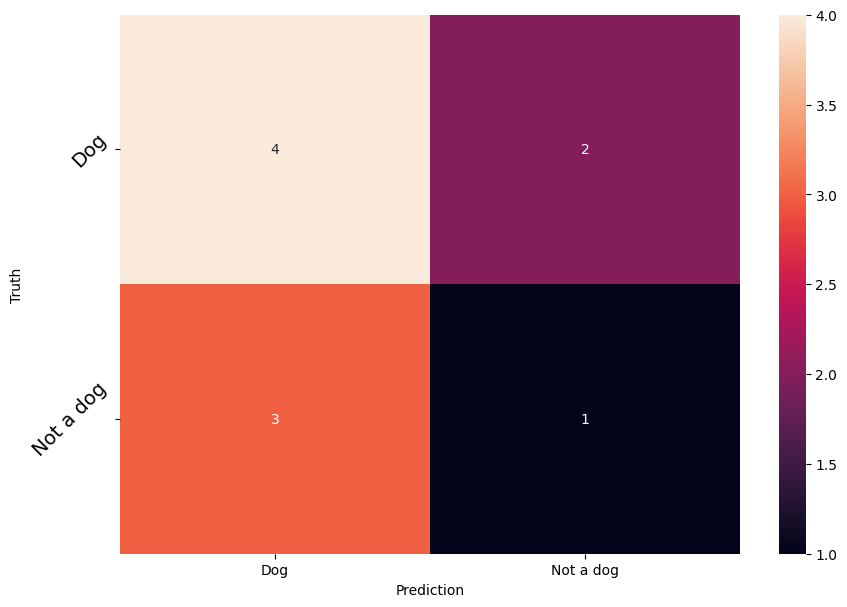

In [4]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,['Dog','Not a dog'])

In [5]:
print(classification_report(truth,prediction))

              precision    recall  f1-score   support

         Dog       0.57      0.67      0.62         6
   Not a dog       0.33      0.25      0.29         4

    accuracy                           0.50        10
   macro avg       0.45      0.46      0.45        10
weighted avg       0.48      0.50      0.48        10



f1 score for Dog class

In [6]:
2*(0.57*0.67)/(0.57+0.67)

0.6159677419354839

f1 score for Not a dog class

In [7]:
2*(0.33*0.25/(0.33+0.25))

0.2844827586206896